# Predict delivery time using sorting time

In [1]:
# importing Basic libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [27]:
# Loading the dataset
Data=pd.read_csv('delivery_time.csv')
Data

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
#getting the Top first 5 data entries to understand the flow of dataset
Data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
#getting the Top last 5 data entries to understand the flow of datset
Data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [5]:
#Checking number of rows and columns in dataset.
Data.shape

(21, 2)

In [6]:
#Checking datatypes of data set
Data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [7]:
#Describing the dataset for know about the statastical measures
Data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
#Checking the null values in dataset
Data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

#### Inference: There is no null entries in the dataset

In [9]:
#Getting the information of dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


### Let's check the ASSUMPTIONS
1.Normality
2.Linearity
3.Multicolinarity
4.AutoRegression Test
5.Homoscedsity Check
6.Zero residual mean

## 1.Normality

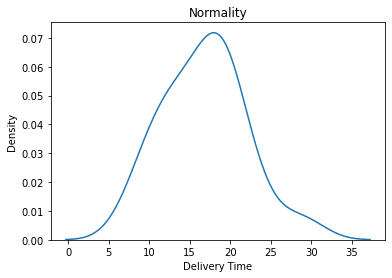

In [10]:
#Ploting the distplot to check for the data distrubution.
sns.distplot(a=Data['Delivery Time'],hist=False)
plt.title('Normality')
plt.show()

In [11]:
Data.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

In [12]:
Data.kurt()

Delivery Time    0.317960
Sorting Time    -1.148455
dtype: float64

#### Inference: Normality test Pass

## 2.Linearity

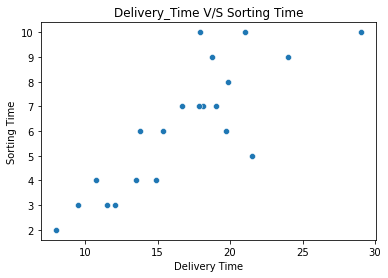

In [13]:
sns.scatterplot(x='Delivery Time',y='Sorting Time',data=Data)
plt.title('Delivery_Time V/S Sorting Time')
plt.show()


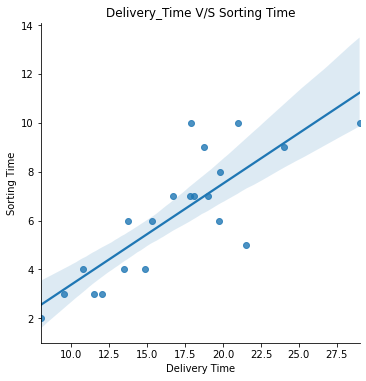

In [14]:
sns.lmplot(x='Delivery Time',y='Sorting Time',data=Data)
plt.title('Delivery_Time V/S Sorting Time')
plt.show()

#### Inference: Linearity test failed

## 3. Multicolinearity Test
#### We can't perform this test here because we have only one input variable.

## 4. Auto Regression Test
#### We cannot perform here as we are having only one input feature and that is also not time based feature.

## 5. Homoscedasticity Test | 6.Zero Residual mean test
#### These 2 Tests can be ony performed post model Training.

### **Note: **
#### In Linear regression we  can be performed by using 2 libraries:
#### 1. StatsModels- OLS[ordinary least square]
#### 2. sklearn- Linear regression()**

# Model Building and Model training using Stats model

In [28]:
Data.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [32]:
linear_model=smf.ols(formula = 'DeliveryTime~SortingTime', data=Data).fit()

In [33]:
linear_model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

## Model Testing

In [39]:
test_data = pd.DataFrame(data={'SortingTime':[10,2,5,4,5,5,4,1,7,4,4,4,5,1,
                                             7,7,7,4,3,5,8,4,2,6,4,8]})
test_data

,SortingTime
0,10
1,2
2,5
3,4
4,5
5,5
6,4
7,1
8,7
9,4


In [40]:
linear_model.predict(test_data)

0     23.072933
1      9.880774
2     14.827833
3     13.178814
4     14.827833
5     14.827833
6     13.178814
7      8.231754
8     18.125873
9     13.178814
10    13.178814
11    13.178814
12    14.827833
13     8.231754
14    18.125873
15    18.125873
16    18.125873
17    13.178814
18    11.529794
19    14.827833
20    19.774893
21    13.178814
22     9.880774
23    16.476853
24    13.178814
25    19.774893
dtype: float64

## Model Deployment

In [41]:
from pickle import dump

In [42]:
dump(linear_model,open('model.pkl','wb'))

In [43]:
from pickle import load

In [44]:
loaded_model = load(open('model.pkl','rb'))

In [45]:
loaded_model.predict(test_data)

0     23.072933
1      9.880774
2     14.827833
3     13.178814
4     14.827833
5     14.827833
6     13.178814
7      8.231754
8     18.125873
9     13.178814
10    13.178814
11    13.178814
12    14.827833
13     8.231754
14    18.125873
15    18.125873
16    18.125873
17    13.178814
18    11.529794
19    14.827833
20    19.774893
21    13.178814
22     9.880774
23    16.476853
24    13.178814
25    19.774893
dtype: float64

## The End